<h1>US Companies Bankruptcy Prediction</h1>

<h2>1.Datasets</h2>
<p>The resulting dataset comprises a total of 78,682 observations of firm-year combinations. To facilitate model training and evaluation, the dataset is divided into three subsets based on time periods. The training set consists of data from 1999 to 2011, the validation set comprises data from 2012 to 2014, and the test set encompasses the years 2015 to 2018. The test set serves as a means to assess the predictive capability of models in real-world scenarios involving unseen cases.</p>
<p>Data Source: Kaggle datasets</p>
<p>Code: <a href="https://github.com/Pipikopimame/orbe_public">"https://github.com/Pipikopimame/orbe_public"</a></p>

In [2]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import us_companies_bankrupt

const = us_companies_bankrupt.base()
const.base_data()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,asset_total,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,opex_total
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


<h2>2.Model Training</h2>
<p>Model: LogisticRegression(max_iter=10000)</p>

In [3]:
data_train = const.data_train()
data = data_train.drop(columns=['company_name','year','status_label'])
label = data_train['status_label'].astype('category').cat.codes

model = LogisticRegression(max_iter=100000)
model.fit(data,label)

# Validation data
df_eval = const.data_valid()
data_eval = df_eval.drop(columns=['company_name','year','status_label'])
label_eval = df_eval['status_label'].astype('category').cat.codes

print('Validation data score {score}%'.format(score = round(100*model.score(data_eval,label_eval),2)))


Validation data score 92.12%


<h2>3.Model Accuracy by "Cross Validation"</h2>

In [4]:
scores = cross_val_score(model,data,label)
score_list = []
for score in scores:
    x = str(round(score*100,2))+'%'
    score_list.append(x)

print("Cross validation score:",score_list)


Cross validation score: ['92.66%', '92.56%', '92.84%', '92.84%', '92.84%']


<h2>4.Bankruptcy Prediction</h2>

<h3>1) Datasets</h3>

In [5]:
data_pred = const.data_pred()
data_pred


,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,asset_total,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,opex_total
0,C_1,alive,2015,873.100,1354.900,70.800,136.900,563.700,47.700,242.700,...,1662.600,1442.100,136.100,66.100,307.700,329.000,637.200,1662.600,576.300,1525.700
1,C_1,alive,2016,888.500,1422.700,71.000,148.200,601.100,56.500,251.400,...,1767.600,1504.100,155.300,77.200,344.900,335.100,688.000,1767.600,589.900,1619.400
2,C_1,alive,2017,942.700,1413.200,40.500,126.500,547.900,15.600,203.000,...,1748.300,1524.700,177.200,86.000,335.100,333.300,701.200,1748.300,588.400,1621.800
3,C_7,alive,2015,228.456,254.922,16.520,45.171,75.684,-5.602,97.778,...,367.422,598.819,157.834,28.651,112.500,148.173,-4.105,367.422,353.798,322.251
4,C_7,alive,2016,212.978,278.049,18.903,56.219,59.610,-38.218,83.062,...,417.011,498.634,122.367,37.316,138.962,146.358,-54.783,417.011,308.552,360.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12277,C_8970,alive,2018,931.600,1475.900,82.500,619.000,280.300,434.900,340.300,...,2731.700,2810.200,1409.500,536.500,1255.800,520.800,650.100,2731.700,2156.200,2112.700
12278,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
12279,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
12280,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


<h3>2) Bankruptcy Prediction</h3>

88 out of the 12282 companies predicted for possible bankrupt


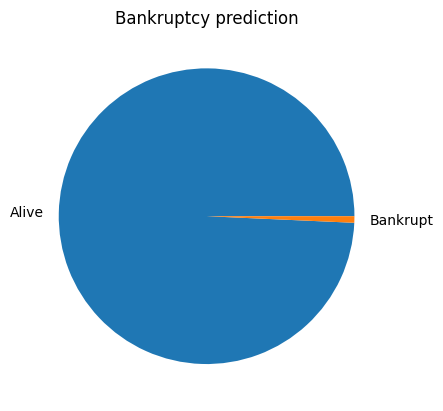

,company_name,year,prediction,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,asset_total,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,opex_total
70,C_54,2015,True,4404.000,3469.000,4270.000,1911.000,399.0,-3056.000,1159.000,...,6636.000,34195.000,6544.000,-2359.000,3167.000,2628.000,14973.000,6636.000,13794.000,4725.000
71,C_54,2016,True,4276.000,2880.000,4327.000,1108.000,323.0,-6132.000,1026.000,...,4762.000,28621.000,6694.000,-3219.000,1882.000,2251.000,8443.000,4762.000,13030.000,3654.000
72,C_54,2017,True,6157.000,7034.000,3207.000,-2185.000,232.0,-4074.000,1024.000,...,5466.000,23112.000,6397.000,-5392.000,-1568.000,2435.000,4911.000,5466.000,10758.000,7651.000
133,C_98,2015,True,3752.000,27919.000,4000.000,-21913.000,570.0,-23119.000,1253.000,...,6383.000,18842.000,8777.000,-25913.000,-21536.000,1841.000,-7269.000,6383.000,14614.000,28296.000
437,C_292,2015,True,2650.000,7764.000,4189.000,6960.000,144.0,878.000,1943.000,...,17900.000,47604.000,18722.000,2771.000,10136.000,4604.000,-1662.000,17900.000,33544.000,10940.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,C_7487,2018,True,4141.400,4968.300,3858.200,4940.500,0.0,725.300,1366.500,...,11957.900,53153.600,26190.000,1082.300,6989.600,10306.100,-4540.400,11957.900,49005.300,7017.400
10307,C_7938,2018,True,1256.200,2896.600,1526.700,1955.700,82.4,-723.000,661.400,...,5713.100,10257.900,72.800,429.000,2816.500,11457.700,-3169.700,5713.100,12177.200,3757.400
10590,C_8089,2015,True,674.088,4910.043,371.772,-4282.067,0.0,-3697.545,127.387,...,768.709,2991.155,3631.506,-4653.839,-4141.334,437.389,-6992.697,768.709,4178.888,5050.776
11842,C_8762,2018,True,18023.000,86623.000,2490.000,7660.000,9837.0,2780.000,5853.000,...,96504.000,92940.000,26980.000,5170.000,9881.000,13216.000,14611.000,96504.000,47887.000,88844.000


In [7]:
data_pred2 = data_pred.drop(columns=['company_name','year','status_label'])
label_pred = data_pred['status_label'].astype('category').cat.codes

y_pred = model.predict(data_pred2)

df_result = pd.DataFrame({'company_name':data_pred['company_name'],'year':data_pred['year'],'prediction':y_pred}).join(data_pred2)
df_result['prediction'] = df_result['prediction'].astype('bool')

df_result2 = df_result[df_result['prediction'] == True]

print("{a} out of the {b} companies predicted for possible bankrupt".format(a=len(df_result2.index),b=len(df_result.index)))

result = [len(df_result.index),len(df_result2.index)]
labels = ['Alive','Bankrupt']
fig,ax = plt.subplots(1,1)
ax.pie(result, labels=labels)
ax.set_title('Bankruptcy prediction')
plt.show()

df_result2

<h3>3) Financial indicator for the companies possible bankrupt</h3>

In [10]:
failed = df_result2.sort_values(by='year',ascending=True)
failed.drop(columns=['company_name','year'],inplace=True)

#profitability
failed['gross_profit(%)'] = round(100*failed['gross_profit']/failed['net_sales'],2)
failed['net_income(%)'] = round(100*failed['net_income']/failed['net_sales'],2)
#ability to meet short term obligation
failed['current_ratio'] = round(failed['current_assets']/failed['current_liabilities'],2)
failed['acid_ratio'] = round((failed['current_assets']-failed['inventory'])/failed['current_liabilities'],2)
failed['receivable_turnover(month)'] = round(failed['total_receivables']*12/failed['net_sales'],2)
failed['inventory_turnover(month)'] = round(failed['inventory']*12/failed['net_sales'],2)
failed['possible_asset_impairment'] = failed['asset_total'] - failed['assets_market_value']

kpi = pd.DataFrame({'company_name':df_result2['company_name'],'year':df_result2['year'],'gross_profit(%)':failed['gross_profit(%)'],
                    'net_income(%)':failed['net_income(%)'],'current_ratio(%)':failed['current_ratio'],'acid_ratio(%)':failed['acid_ratio'],
                    'receivable_turnover(month)':failed['receivable_turnover(month)'],'inventory_turnover(month)':failed['inventory_turnover(month)'],
                    'possible_asset_impairment':failed['possible_asset_impairment']})
kpi#.sort_values(by='current_ratio(%)',ascending=True)

,company_name,year,gross_profit(%),net_income(%),current_ratio(%),acid_ratio(%),receivable_turnover(month),inventory_turnover(month),possible_asset_impairment
70,C_54,2015,47.72,-46.05,1.68,1.52,2.10,0.72,20327.4899
71,C_54,2016,39.52,-128.77,1.90,1.76,2.59,0.81,8904.7823
72,C_54,2017,-28.69,-74.53,2.53,2.43,2.25,0.51,8156.3866
133,C_98,2015,-337.40,-362.20,2.04,1.73,2.36,1.07,2030.8280
437,C_292,2015,56.63,4.91,0.58,0.54,1.30,0.10,33921.9920
...,...,...,...,...,...,...,...,...,...
9588,C_7487,2018,58.45,6.07,0.40,0.40,1.37,0.00,37594.1056
10307,C_7938,2018,49.30,-12.66,0.11,0.10,1.39,0.17,10168.2390
10590,C_8089,2015,-538.74,-481.01,1.54,1.54,1.99,0.00,2864.4608
11842,C_8762,2018,10.24,2.88,1.36,0.62,0.73,1.22,52813.2000
